<a href="https://colab.research.google.com/github/Akshatpattiwar512/Convolutional-Neural-Network/blob/main/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns


print('Tensorflow Version {}'.format(tf.__version__))

Tensorflow Version 2.4.1


In [4]:
import pandas as pd

train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

print('Total size of the train dataset is {}'.format(train_dataset.shape))
print('Total size of the test dataset is {}'.format(test_dataset.shape))

Total size of the train dataset is (16061, 785)
Total size of the test dataset is (15508, 784)


In [5]:
y_train = train_dataset['label']

X_train = train_dataset.drop(['label'], axis=1)


print('Size of X_train {}'.format(X_train.shape))
print('Size of y_train {}'.format(y_train.shape))

Size of X_train (16061, 784)
Size of y_train (16061,)


In [6]:
train_dataset.isna().any().describe()

count      785
unique       2
top       True
freq       475
dtype: object

In [7]:
test_dataset.isna().any().describe()

count      784
unique       2
top       True
freq       505
dtype: object

In [8]:
# Normalization of the data
X_train = X_train/255.0
test_dataset = test_dataset/255.0

In [9]:
# Reshaping of the dataset
X_train = X_train.values.reshape(-1, 28, 28, 1)
test_dataset = test_dataset.values.reshape(-1,28,28,1)

print('Shape of the train dataset is {}'.format(X_train.shape))
print('Shape of the test dataset is {}'.format(test_dataset.shape))

Shape of the train dataset is (16061, 28, 28, 1)
Shape of the test dataset is (15508, 28, 28, 1)


In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

print('Shape of y_train after one hot encoding {}'.format(y_train.shape))

Shape of y_train after one hot encoding (16061, 10)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, shuffle=True, test_size=0.2)

print('Size of train dataset is {}'.format(x_train.shape))
print('Size of the val dataset is {}'.format(x_val.shape))

Size of train dataset is (12848, 28, 28, 1)
Size of the val dataset is (3213, 28, 28, 1)


In [12]:
X = train_dataset.drop(['label'], axis=1, inplace=False)

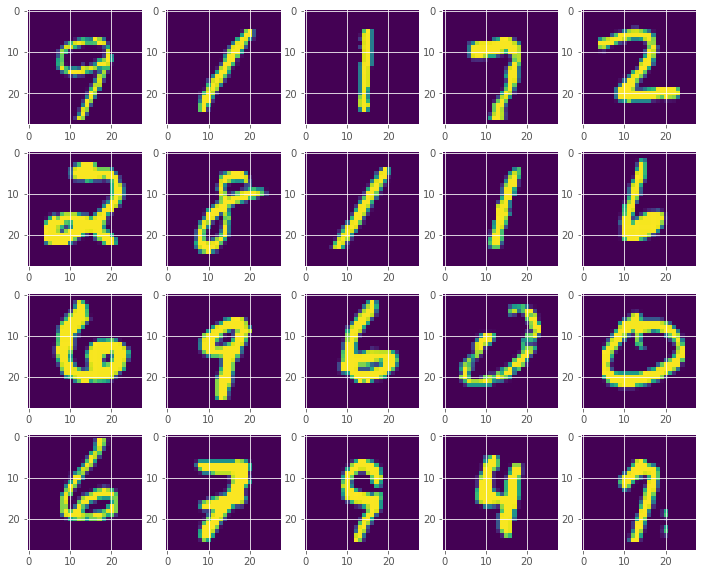

In [13]:
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
for i in  range(20)  :
    plt.subplot(4,5,i+1)
    plt.imshow(X.values[ np.random.randint(1,X.shape[0])].reshape(28,28))

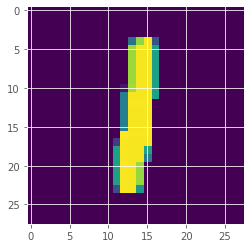

In [14]:
#visualization of training set
import random
i = random.randint(10,5000)
plt.imshow(x_train[i][:,:,0])

In [15]:
# setting up model parameters
input_shape = (28,28,1)
batch_size = 64
num_classes = y_train.shape[1]
epochs = 20

In [16]:
# CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding ='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding ='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')   
    
])

model.compile (optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') is not None and logs.get('acc')> 0.995):
            print("\n Reached 99.5% of accuracy!!")
            self.model.stop_training=True
            
callback= myCallback()


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

datagen.fit(x_train)

In [19]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                  epochs=epochs,
                  validation_data= (x_val, y_val),
                  callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
201/201 [==============================] - 95s 466ms/step - loss: nan - accuracy: 0.4326 - val_loss: nan - val_accuracy: 0.0977
Epoch 2/20
201/201 [==============================] - 93s 463ms/step - loss: nan - accuracy: 0.0938 - val_loss: nan - val_accuracy: 0.0977
Epoch 3/20
201/201 [==============================] - 92s 460ms/step - loss: nan - accuracy: 0.0965 - val_loss: nan - val_accuracy: 0.0977
Epoch 4/20
201/201 [==============================] - 92s 460ms/step - loss: nan - accuracy: 0.0960 - val_loss: nan - val_accuracy: 0.0977
Epoch 5/20
201/201 [==============================] - 94s 467ms/step - loss: nan - accuracy: 0.0937 - val_loss: nan - val_accuracy: 0.0977
Epoch 6/20
201/201 [==============================] - 94s 470ms/step - loss: nan - accuracy: 0.0952 - val_loss: nan - val_accuracy: 0.0977
Epoch 7/20
201/201 [==============================] - 93s 464ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0977
Epoch 8/20
201/201 [=======

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

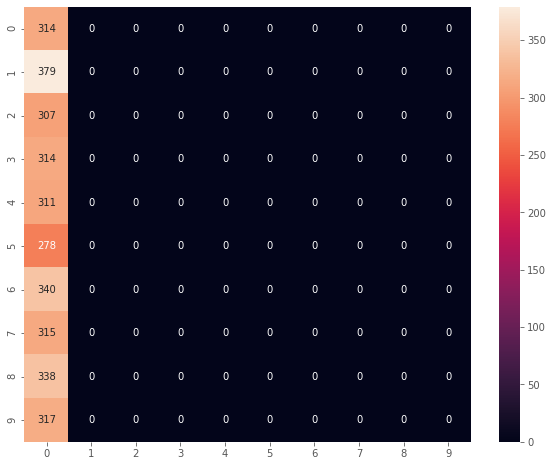

In [22]:
y_val_predict = model.predict(x_val)

y_val_predict_class = np.argmax(y_val_predict, axis=1)


y_val_true_class = np.argmax(y_val, axis=1)


confusion_matrix = tf.math.confusion_matrix(y_val_true_class, y_val_predict_class)


# heatmap for confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [23]:
y = train_dataset['label']

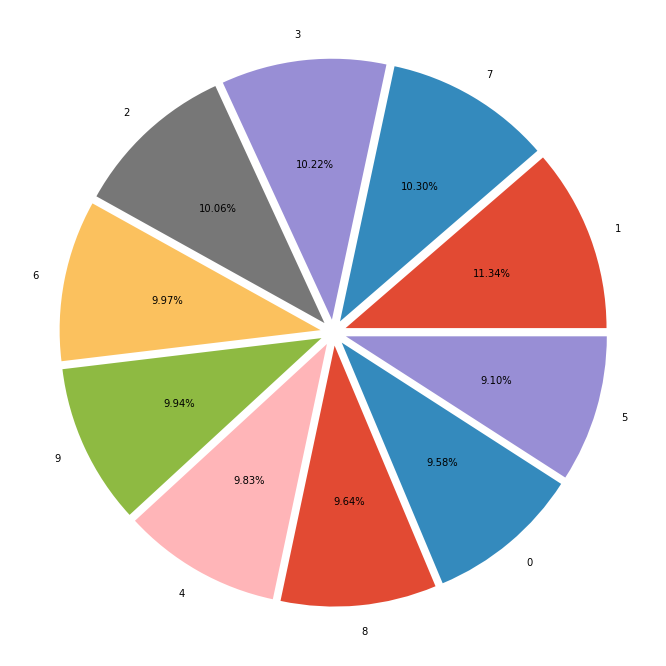

In [24]:
plt.figure(figsize=(12,12))
plt.pie(y.value_counts(),labels=list(y.value_counts().index),autopct ='%1.2f%%' ,
        labeldistance = 1.1,explode = [0.05 for i in range(len(y.value_counts()))] )
plt.show()

In [25]:
# predict result of test dataset

predict_test = model.predict(test_dataset)
results = np.argmax(predict_test, axis=1)


print(results)

[0 0 0 ... 0 0 0]
